- **Purpose:** Visium HD data analysis using sainsc
- **Author:** Tamim Ahsan
- **Date:** July 13, 2025

In this notebook, I follow along the tutorial delineated in the documentation of sainsc package, which is a part of the scverse

# 0. Install packages and download the dataset

In [2]:
# Install sainsc
!pip install sainsc[spatialdata]

In [3]:
# Install scanpy
!pip install scanpy

In [4]:
# Install spatialdata-io
!pip install spatialdata-io

In [5]:
!pip install spatialdata[extra]

In [6]:
# Import packages
import scanpy as sc
import sainsc as scs
import spatialdata_io

/usr/lib/python3.11/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)
/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA d

In [16]:
%%bash
# Download the dataset
curl -O https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Colon_Cancer/Visium_HD_Human_Colon_Cancer_web_summary.html
curl -O https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Colon_Cancer/Visium_HD_Human_Colon_Cancer_cloupe_008um.cloupe
curl -O https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Colon_Cancer/Visium_HD_Human_Colon_Cancer_feature_slice.h5
curl -O https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Colon_Cancer/Visium_HD_Human_Colon_Cancer_metrics_summary.csv
curl -O https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Colon_Cancer/Visium_HD_Human_Colon_Cancer_molecule_info.h5
curl -O https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Colon_Cancer/Visium_HD_Human_Colon_Cancer_spatial.tar.gz
curl -O https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Colon_Cancer/Visium_HD_Human_Colon_Cancer_binned_outputs.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.7M    0 21.7M    0     0  15.8M      0 --:--:--  0:00:01 --:--:-- 15.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7315M  100 7315M    0     0  24.6M      0  0:04:56  0:04:56 --:--:-- 23.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  751M  100  751M    0     0  21.9M      0  0:00:34  0:00:34 --:--:-- 24.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1729  100  1729    0     0   4884      0 --:--:-- --:--:-- --:--:--  4898
  % Total    % Received % Xferd  Average Speed   Tim

In [18]:
# Put all the downloaded files in a common directory
!mkdir Visium_HD_Files
!mv Visium_HD_Human* Visium_HD_Files

mkdir: cannot create directory ‘Visium_HD_Files’: File exists


In [19]:
# Unzip the the file
!tar -xzvf Visium_HD_Files/Visium_HD_Human_Colon_Cancer_binned_outputs.tar.gz
!mv binned_outputs Visium_HD_Files/

binned_outputs/
binned_outputs/square_002um/
binned_outputs/square_002um/filtered_feature_bc_matrix/
binned_outputs/square_002um/filtered_feature_bc_matrix/matrix.mtx.gz
binned_outputs/square_002um/filtered_feature_bc_matrix/features.tsv.gz
binned_outputs/square_002um/filtered_feature_bc_matrix/barcodes.tsv.gz
binned_outputs/square_002um/filtered_feature_bc_matrix.h5
binned_outputs/square_002um/raw_feature_bc_matrix/
binned_outputs/square_002um/raw_feature_bc_matrix/matrix.mtx.gz
binned_outputs/square_002um/raw_feature_bc_matrix/features.tsv.gz
binned_outputs/square_002um/raw_feature_bc_matrix/barcodes.tsv.gz
binned_outputs/square_002um/raw_feature_bc_matrix.h5
binned_outputs/square_002um/raw_probe_bc_matrix.h5
binned_outputs/square_002um/spatial/
binned_outputs/square_002um/spatial/aligned_fiducials.jpg
binned_outputs/square_002um/spatial/aligned_tissue_image.jpg
binned_outputs/square_002um/spatial/cytassist_image.tiff
binned_outputs/square_002um/spatial/detected_tissue_image.jpg
binn

In [7]:
# Read the entire dataset
visium_path = "Visium_HD_Files"

# 1. Cell typing - 16 um bins

In [8]:
# Load teh data
spatial_visium = spatialdata_io.visium_hd(visium_path, bin_size = 16)
spatial_visium

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipython-input-8-4137239853.py:2: UserWarning: No full resolution image found. If incorrect, please specify the path in the `fullres_image_file` parameter when calling the `visium_hd` reader function.
  spatial_visium = spatialdata_io.visium_hd(visium_path, bin_size = 16)


SpatialData object
├── Images
│     ├── 'Visium_HD_Human_Colon_Cancer_hires_image': DataArray[cyx] (3, 3886, 6000)
│     └── 'Visium_HD_Human_Colon_Cancer_lowres_image': DataArray[cyx] (3, 389, 600)
├── Shapes
│     └── 'Visium_HD_Human_Colon_Cancer_square_016um': GeoDataFrame shape: (137051, 1) (2D shapes)
└── Tables
      └── 'square_016um': AnnData (137051, 18085)
with coordinate systems:
    ▸ 'Visium_HD_Human_Colon_Cancer', with elements:
        Visium_HD_Human_Colon_Cancer_hires_image (Images), Visium_HD_Human_Colon_Cancer_lowres_image (Images), Visium_HD_Human_Colon_Cancer_square_016um (Shapes)
    ▸ 'Visium_HD_Human_Colon_Cancer_downscaled_hires', with elements:
        Visium_HD_Human_Colon_Cancer_hires_image (Images), Visium_HD_Human_Colon_Cancer_square_016um (Shapes)
    ▸ 'Visium_HD_Human_Colon_Cancer_downscaled_lowres', with elements:
        Visium_HD_Human_Colon_Cancer_lowres_image (Images), Visium_HD_Human_Colon_Cancer_square_016um (Shapes)

In [9]:
# Keep the adata with 16 um data
adata_16um = spatial_visium.tables["square_016um"]
adata_16um

AnnData object with n_obs × n_vars = 137051 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [10]:
# Look at the var
adata_16um.var.head()

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38


In [11]:
# Reset the index of the var dataframe
adata_16um.var = adata_16um.var.reset_index(names = "gene_name").set_index("gene_ids")
adata_16um.var.head()

,gene_name,feature_types,genome
gene_ids,,,
ENSG00000187634,SAMD11,Gene Expression,GRCh38
ENSG00000188976,NOC2L,Gene Expression,GRCh38
ENSG00000187961,KLHL17,Gene Expression,GRCh38
ENSG00000187583,PLEKHN1,Gene Expression,GRCh38
ENSG00000187642,PERM1,Gene Expression,GRCh38


In [12]:
adata_16um.var.head()

,gene_name,feature_types,genome
gene_ids,,,
ENSG00000187634,SAMD11,Gene Expression,GRCh38
ENSG00000188976,NOC2L,Gene Expression,GRCh38
ENSG00000187961,KLHL17,Gene Expression,GRCh38
ENSG00000187583,PLEKHN1,Gene Expression,GRCh38
ENSG00000187642,PERM1,Gene Expression,GRCh38


In [13]:
# Calculate the quality metrics
sc.pp.calculate_qc_metrics(adata_16um, inplace = True, log1p = False)

/tmp/ipython-input-14-2350301868.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_16um, color = "total_counts", spot_size = 100)


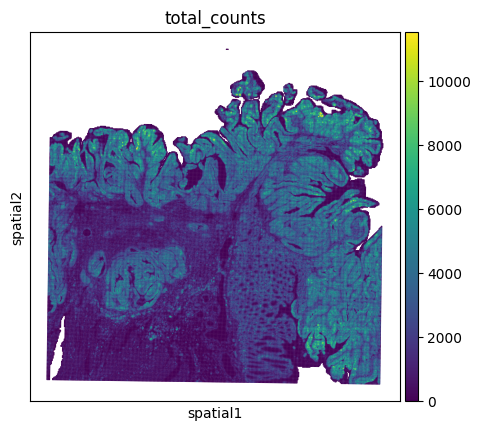

In [14]:
# See what the sample looks like
sc.pl.spatial(adata_16um, color = "total_counts", spot_size = 100)

In [15]:
# Filter cells and genes
sc.pp.filter_genes(adata_16um, min_cells = 20)
sc.pp.filter_cells(adata_16um, min_counts = 200)

In [16]:
# Highly variable gene selection
!pip install scikit-misc
sc.pp.highly_variable_genes(adata_16um, n_top_genes=2000, flavor="seurat_v3")

In [17]:
# Normalization
sc.pp.normalize_total(adata_16um, target_sum=1e4)
sc.pp.log1p(adata_16um)

In [18]:
# PCA
seed = 41
sc.pp.pca(adata_16um, random_state = seed)

In [19]:
# Neighbours
sc.pp.neighbors(adata_16um, random_state=seed)

/tmp/ipython-input-20-2138918159.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_16um, random_state = seed)


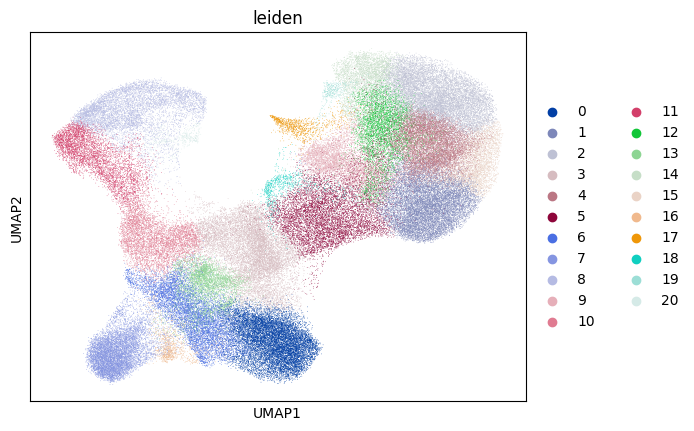

In [20]:
# Clustering
!pip install igraph
!pip install leidenalg
sc.tl.umap(adata_16um, random_state = seed)
sc.tl.leiden(adata_16um, random_state = seed)
sc.pl.umap(adata_16um, color = "leiden")

/tmp/ipython-input-21-3482123375.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_16um, color = "leiden", spot_size = 100)


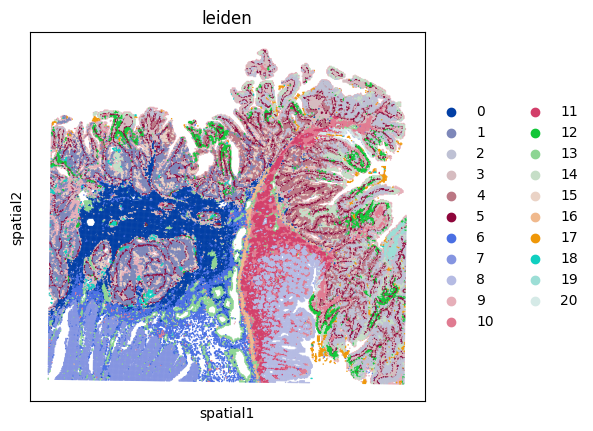

In [21]:
# Project the low dimensional data onto the tissue
sc.pl.spatial(adata_16um, color = "leiden", spot_size = 100)

# 3. Generating cell type signature

In [22]:
# Generate the signature
signatures = scs.utils.celltype_signatures(adata_16um[:, adata_16um.var["highly_variable"]])
signatures

,2,3,17,0,5,7,9,15,1,12,...,6,10,11,8,13,4,16,20,19,18
gene_ids,,,,,,,,,,,,,,,,,,,,,
ENSG00000187608,0.157638,0.445606,0.216834,0.364210,0.246253,0.077884,0.086363,0.091968,0.108330,0.215060,...,0.164857,0.195280,0.062839,0.094062,0.216151,0.079212,0.261056,0.535477,1.894247,0.372311
ENSG00000186891,0.004914,0.084419,0.016520,0.018598,0.039290,0.002887,0.006382,0.000280,0.003389,0.008684,...,0.021707,0.074991,0.017613,0.007879,0.008969,0.003682,0.018463,0.004544,0.005851,0.025726
ENSG00000186827,0.002431,0.107212,0.003076,0.008442,0.046864,0.005021,0.005461,0.000356,0.002597,0.003593,...,0.018878,0.056684,0.006524,0.003837,0.022880,0.001922,0.017728,0.012221,0.021364,0.015719
ENSG00000162576,0.006431,0.408014,0.011700,0.970491,0.185770,0.120575,0.022543,0.003779,0.021697,0.029318,...,0.393688,0.155357,0.062169,0.022019,0.140918,0.007989,0.495409,0.050980,0.029476,0.039765
ENSG00000179403,0.264603,0.436453,0.076611,0.041679,0.316835,0.360174,0.057695,0.106788,0.112791,0.300031,...,0.071575,0.111385,0.155184,0.134069,0.284462,0.209786,0.118671,0.637221,0.279518,0.037525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165370,0.000447,0.000321,0.002692,0.000000,0.000339,0.000000,0.000551,0.000000,0.001206,0.000000,...,0.000000,0.000841,0.000000,0.000000,0.000000,0.000745,0.000000,0.000000,0.000000,0.000000
ENSG00000182492,0.009908,0.799290,0.011433,1.629050,0.305239,0.121891,0.032568,0.012048,0.020080,0.017857,...,0.846705,0.197707,0.046238,0.015049,0.659818,0.010166,0.437303,0.058996,0.074471,0.111031
ENSG00000130821,0.562664,0.088608,0.105292,0.041647,0.303115,0.118186,0.163713,0.465346,0.328188,0.426324,...,0.027338,0.041620,0.116203,0.437565,0.030437,0.471218,0.068707,1.431640,0.477219,0.061968


In [23]:
# Color map
cmap = dict(zip(adata_16um.obs["leiden"].cat.categories, adata_16um.uns["leiden_colors"]))
cmap

{'0': '#023fa5',
 '1': '#7d87b9',
 '2': '#bec1d4',
 '3': '#d6bcc0',
 '4': '#bb7784',
 '5': '#8e063b',
 '6': '#4a6fe3',
 '7': '#8595e1',
 '8': '#b5bbe3',
 '9': '#e6afb9',
 '10': '#e07b91',
 '11': '#d33f6a',
 '12': '#11c638',
 '13': '#8dd593',
 '14': '#c6dec7',
 '15': '#ead3c6',
 '16': '#f0b98d',
 '17': '#ef9708',
 '18': '#0fcfc0',
 '19': '#9cded6',
 '20': '#d5eae7'}

In [24]:
# Delete the spatialdata file to save space
del spatial_visium
del adata_16um

# 4. Subcellular typing

In [ ]:
# Load the unbinned data
unbinned_path = "Visium_HD_Files/binned_outputs/square_002um"
visium_unbinned = scs.io.read_VisiumHD(unbinned_path)
visium_unbinned

**The colab session keeps crashing at this stage. However, the following codes are written any way. This notebook thus shows that Visium HD data analysis was explored using a segmentation-free method**

In [ ]:
# KDE estimation
visium_unbinned.gaussian_kernel(4, unit = "um")
visium_unbinned.calculate_total_mRNA_KDE()
_ = visium_unbinned.plot_KDE_histogram(bins = 100)

In [ ]:
# Zoomin in on the region of interest
_ = visium_unbinned.plot_KDE_histogram(bins = 100, range = (0, 20))

In [ ]:
# Filtering the background
visium_unbinned.filter_background(4.5)

In [ ]:
_ = visium_unbinned.plot_KDE(im_kwargs = {"vmax": 200})

In [ ]:
visium_unbinned.assign_celltype(signatures, log = True)
_ = visium_unbinned.plot_celltype_map(cmap = cmap)

In [5]:
import scanpy as sc
sc.logging.print_header()

/usr/local/lib/python3.11/dist-packages/session_info2/__init__.py:124: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  and (v := getattr(pkg, "__version__", None))


AttributeError: 'HBox' object has no attribute '_repr_mimebundle_'

scanpy	1.11.3
----	----
platformdirs	4.3.8
ipykernel	6.17.1
grpc-google-iam-v1	0.14.2
h5py	3.14.0
sphinxcontrib-htmlhelp	2.1.0
google-cloud-datastore	2.21.0
aiohttp	3.11.15
google-resumable-media	2.7.2
ipython-genutils	0.2.0
MarkupSafe	3.0.2
jupyter-client	6.1.12
pytz	2025.2
importlib-metadata	8.7.0
Pygments	2.19.2
propcache	0.3.2
pandas	2.2.2
frozenlist	1.7.0
simplejson	3.20.1
google-cloud-translate	3.21.1
Jinja2	3.1.6
tqdm	4.67.1
wrapt	1.17.2
google-cloud-functions	1.20.4
cryptography	43.0.3
session-info2	0.1.2
aiohappyeyeballs	2.6.1
joblib	1.5.1
jaraco.classes	3.4.0
google-cloud-dataproc	5.21.0
google-cloud-aiplatform	1.102.0
numba	0.60.0
shapely	2.1.1
google-cloud-bigquery-connection	1.18.3
nvidia-ml-py	12.575.51
requests	2.32.3
aiosignal	1.4.0
more-itertools	10.7.0
python-dateutil	2.9.0.post0
kiwisolver	1.4.8
igraph	0.11.9
setuptools	75.2.0
grpcio-status	1.71.2
dill	0.3.7
pyparsing	3.2.3
chardet	5.2.0
importlib_metadata	8.7.0
attrs	25.3.0
matplotlib	3.10.0
sphinxcontrib-qthelp	2.0